# Imputing Missing Values using Gaussian Process

In [1]:
from mimic.data_imputation.impute_GP import GPImputer
import pandas as pd
import numpy as np

In [2]:
data_to_infer = pd.read_csv(
    r"C:\Users\User\Documents\GitHub\MIMIC\mimic\data_imputation\simulations0.csv", header=None, sep=",")

In [3]:
# Fraction of rows to remove
fraction = 0.1

# Randomly select fraction of y-values
missing_y = data_to_infer.iloc[:, 1].sample(frac=fraction)

# Set the selected y-values to NaN
data_to_infer.loc[missing_y.index, 1] = np.nan

# Now data_to_infer has 10% of y-values in the second column set to NaN

In [4]:
data_to_infer

,0,1,2,3
0,0.0,0.157677,1.360714,0.105171
1,1.0,NaN,1.224107,0.104076
2,2.0,0.254910,1.191880,0.105120
3,3.0,0.301873,1.187027,0.108652
4,4.0,0.341157,1.189785,0.114460
...,...,...,...,...
95,95.0,0.383696,1.202004,0.193369
96,96.0,0.383966,1.202142,0.194253
97,97.0,0.383963,1.202214,0.194996
98,98.0,0.383806,1.202244,0.195601


In [5]:
data_to_infer.iloc[:, 1]

0     0.157677
1          NaN
2     0.254910
3     0.301873
4     0.341157
        ...   
95    0.383696
96    0.383966
97    0.383963
98    0.383806
99    0.383577
Name: 1, Length: 100, dtype: float64

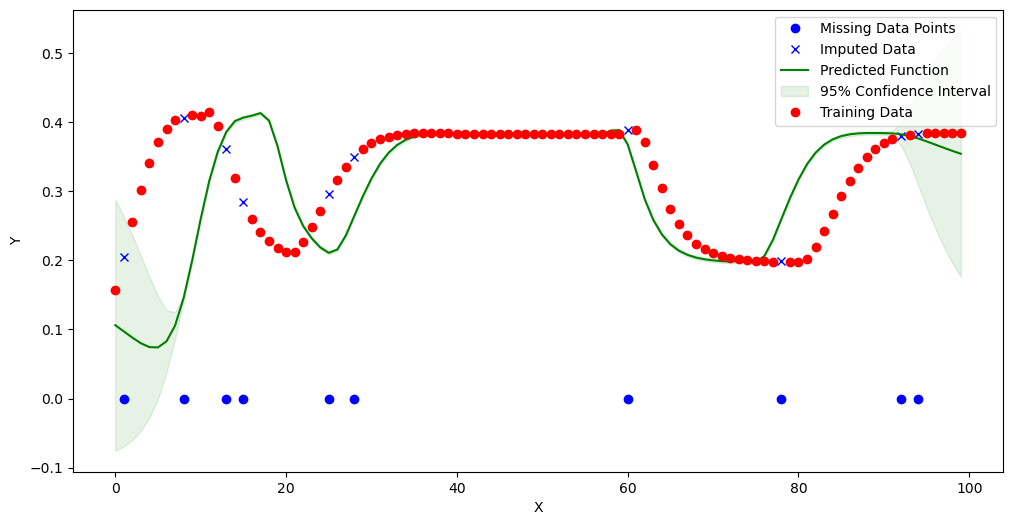

In [6]:
new_dataset = GPImputer().impute_missing_values(data_to_infer, [0], 1)